<h1>Projekt – Naiwny Klasyfikator Bayesowski</h1>

Celem niniejszego projektu jest zaimplementowane Naive Bayes Classifier w wariancie działającym na zmiennych kategorycznych oraz ilościowych w celach edukacyjnych oraz przetestowanie jego działania na zbiorach testowych danych Iris i Mushroom w celu oceny jakości działania modelu (sprawdzamy gatunki kwiatów/to, czy grzyb jest trujący według cech)


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline



import warnings

warnings.filterwarnings('ignore')

In [4]:
iris_input = 'data/iris.csv'
mushroom_input = 'data/mushrooms.csv'

dfi = pd.read_csv(iris_input, header=None, sep=',')
dfm = pd.read_csv(mushroom_input, header=None, sep=',')

Przystąpmy do pierwotnej analizy danych - zobaczmy z jak dużymi strukturami jakich danych mamy do czynienia?

In [7]:
dfi.shape

(151, 5)

In [8]:
dfm.shape

(8125, 23)

In [9]:
dfi.head()

,0,1,2,3,4
0,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa


In [10]:
dfm.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
2,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
3,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
4,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u


Jak widać powyżej - pierwszy rząd danych zawiera opisy danych, zamiast samych danych w obu zbiorach - naprawmy to.

In [15]:
dfi.columns = dfi.iloc[0]
dfi = dfi[1:]
dfi.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [17]:
dfm.columns = dfm.iloc[0]
dfm = dfm[1:]
dfm.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
2,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
3,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
4,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
5,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [19]:
dfi.info()
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal_length  150 non-null    object
 1   sepal_width   150 non-null    object
 2   petal_length  150 non-null    object
 3   petal_width   150 non-null    object
 4   species       150 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 1 to 8124
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment   

Zauważamy, że zmienne numeryczne z kolumn w zbiorze z irysami nie jest zapisana w formacie `float` - przekonwertujmy ją na odpowiedni typ danych.

In [23]:
for cname in dfi.columns:
    if cname != 'species':
        dfi[cname] = pd.to_numeric(dfi[cname])

dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Przeanalizujmy wstępnie czy nasze dane nie zawierają wartości typu null w którejś kolumnie.

In [26]:
dfm.isnull().sum()

0
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Wygląda na to, że nie ma żadnych danych typu null w naszych zbiorach - zweryfikujmy to jednak sprawdzając jakie typy danych znajdują się w poszczególnych kolumnach.

Jednocześnie zweryfikujemy treść polecenia - dowiemy się, że wszystkie cechy w zbiorze Mushroom to zmienne kategoryczne, natomiast wszystkie cechy w zbiorze Iris to zmienne ilościowe.

In [29]:
for cname in dfi.columns:   
    print(dfi[cname].value_counts())

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: sepal_length, dtype: int64
3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: sepal_width, dtype: int64
1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7  

In [31]:
for cname in dfm.columns:
    print(dfm[cname].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

Uwaga! Pomimo, że na pierwszy rzut oka oba zbiory danych wyglądały, jakby nie zawierały żadnych pustych wartości, to możemy zauważyć, że w zbiorze Mushroom kolumna o nazwie `stalk_shape` zawiera wiele wartości o nazwie "?" - zakładamy, że są to wybrakowane dane. 

Przed trenowaniem naszego modelu i dalszą analizą podmienimy te wartości na NaN - dalsza analiza wykaże, jakie kroki powinniśmy zastosować w celu poradzenia sobie z tym problemem.

Na razie zobaczmy jak wiele danych różnych typów zawierają nasze zbiory - zobaczmy stosunek ilości gatunków irysów wobec siebie oraz gatunków jadalnych do trujących.

In [34]:
dfm['stalk-shape'].replace('?', np.NaN, inplace=True)

In [36]:
dfm["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [38]:
dfi["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Powyższa analiza weryfikuje, że w zbiorze zawierającym Irysy jest dokładnie tyle samo każdego z gatunków kwiatu - natomiast w zbiorze z gatunkami grzybów mamy do czynienia z przybliżenie podobną ilością grzybów trujących i jadalnych.

Sprawdźmy, czy któreś z kolumn w zbiorze grzybów zawierają dużą ilość unikalnych zmiennych.

In [41]:
"""
for cname in dfm.columns:
    print(cname, ' contains ', len(dfm[cname].unique()), ' labels')
"""

pd.options.display.max_columns = dfm.shape[1]
dfm.describe(include = 'all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Zauważamy dwie znaczące rzeczy - po pierwsze, najwięcej zmiennych kategorycznych zawierają dane w kolumnach `gill-color`, a także `cap-color` - zwrócimy szczególną uwagę na to, czy wszystkie rodzaje tych zmiennych pojawią się w zbiorze danych testowych. Dodatkowo zauważamy, że kolumna `veil-type` zawiera jedynie jeden typ zmiennej - innymi słowy, jest ona zbędna dla naszej dalszej analizy i możemy ją odrzucić już na tym etapie. 

`veil-color` oraz `gill-attachment` zawierają niemalże tylko jeden typ danych - je również potraktujemy jako zbyt pospolite, żeby mogły świadczyć o tym, że grzyb jest trujący lub też i nie (Uwaga - usuniemy je dopiero pod koniec tego notatnika)!

W tej sekcji przeanalizujemy zbiór irysów, obliczając statystyki opisowe dla każdej cechy. Dowiemy się, jakie wartości przyjmują średnie, mediany i odchylenia standardowe.

In [45]:
dfi.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Aby lepiej zrozumieć rozkład poszczególnych cech, narysujemy histogramy. Pozwoli nam to zobaczyć, jakie wartości dominują w danych i czy są w nich jakieś odchylenia lub nietypowe przypadki.

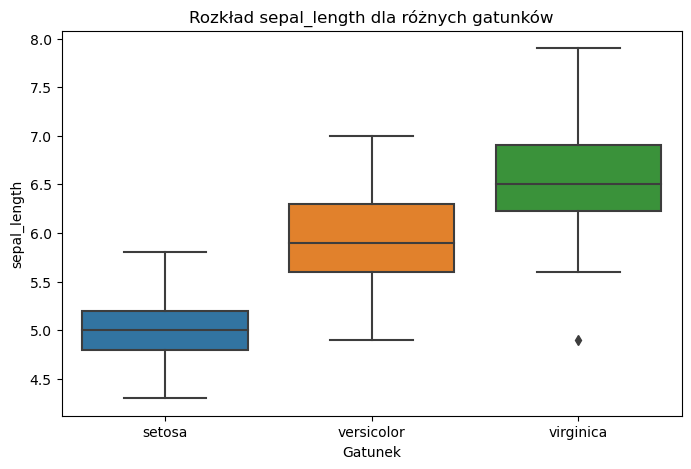

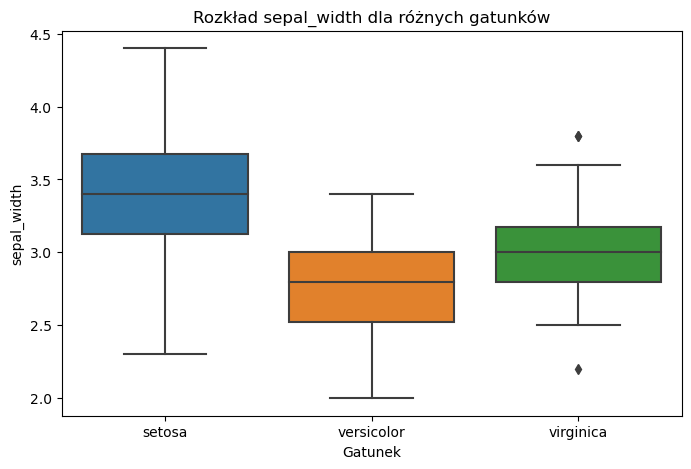

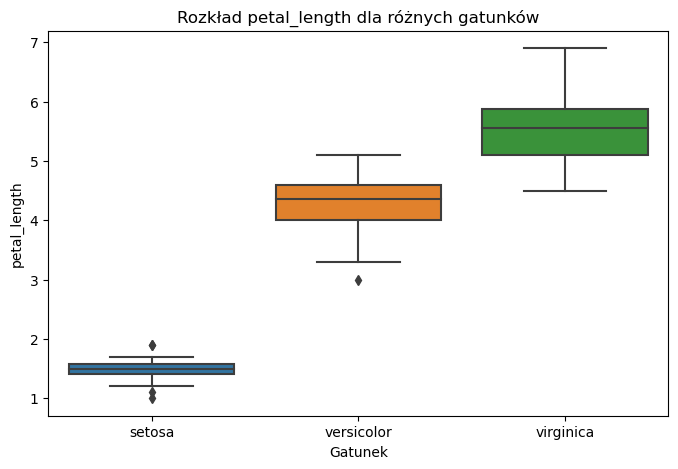

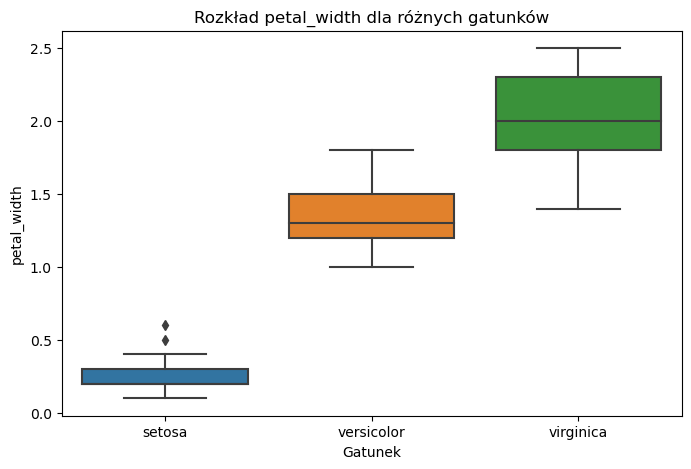

In [48]:
# Lista cech
features = [col for col in dfi.columns if col != 'species']

# Wykresy słupkowe dla każdej cechy
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=dfi, x='species', y=feature)
    plt.title(f'Rozkład {feature} dla różnych gatunków')
    plt.xlabel('Gatunek')
    plt.ylabel(feature)
    plt.show()

Macierz korelacji pozwoli nam zidentyfikować zależności między cechami. Dzięki temu możemy stwierdzić, które z nich są ze sobą mocno powiązane i mogą nie wnosić nowej informacji do modelu.

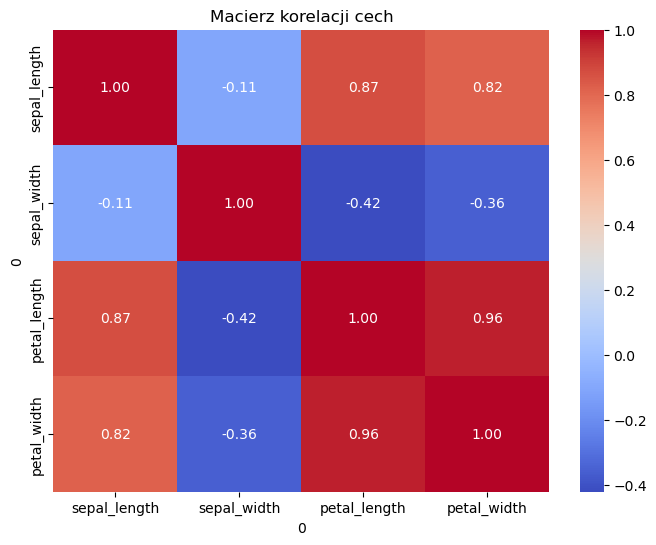

In [50]:
correlation_matrix = dfi.iloc[:, :-1].corr()

# Wizualizacja korelacji
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Macierz korelacji cech')
plt.show()

Scatterplot pozwala na wizualizację relacji między parami cech numerycznych. Dzięki temu możemy zauważyć, czy istnieją liniowe zależności między dwiema cechami oraz jak dane są rozmieszczone względem siebie.

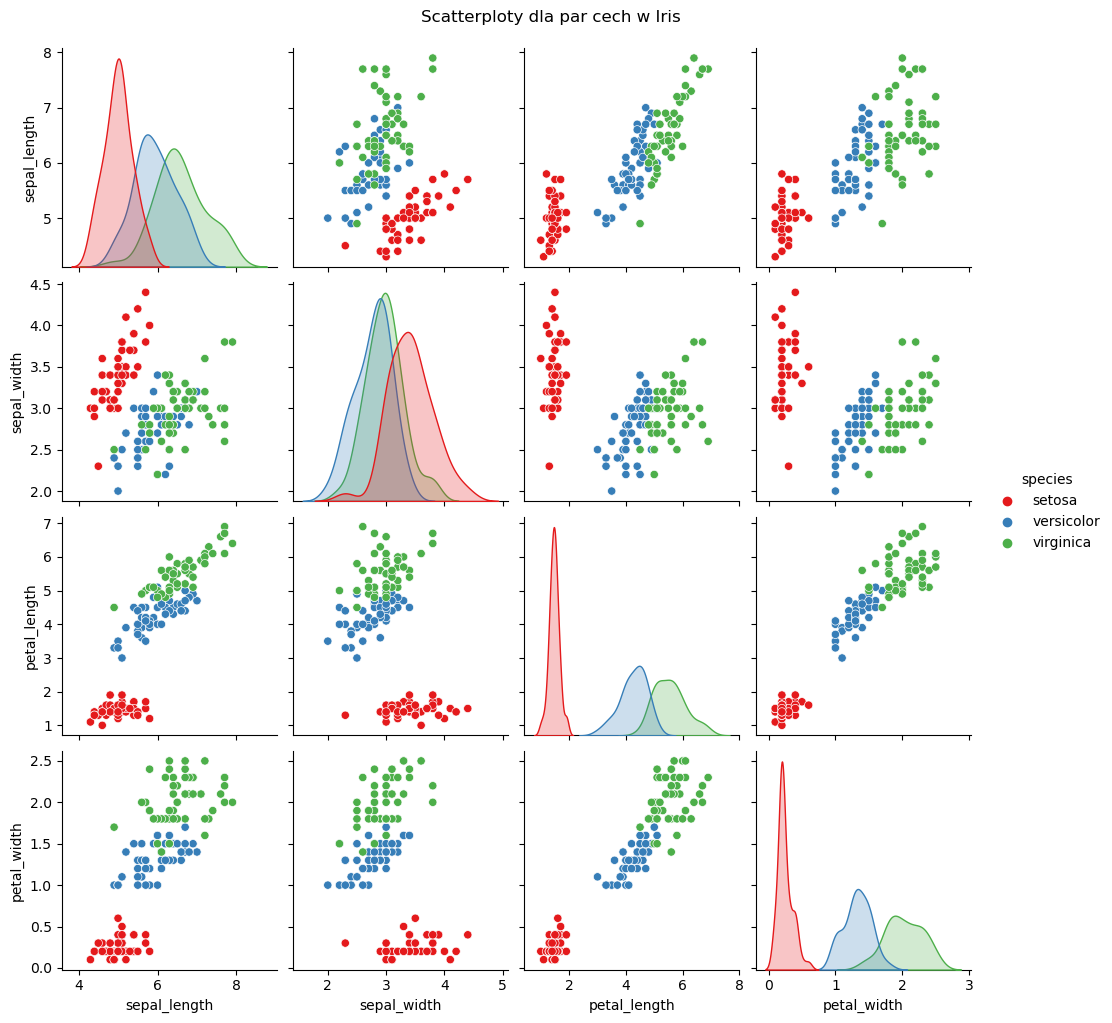

In [52]:
sns.pairplot(dfi, hue='species', palette='Set1')
plt.suptitle('Scatterploty dla par cech w Iris', y=1.02)
plt.show()

Po przeanalizowaniu danych zauważamy, że niektóre cechy są ze sobą mocno skorelowane. Dlatego w kolejnych krokach przygotujemy różne warianty zbiorów danych, aby sprawdzić wpływ korelacji na działanie modelu.

Przygotujemy dwa zbiory do trenowania naszego modelu. Pierwszy będzie zawierał pełen zestaw cech, a drugi wykluczy mocno skorelowane zmienne, takie jak `petal_length`.

In [57]:
dfi.to_csv('data_output/dfi.csv', index=False)
dfi.drop('petal_length', axis=1).to_csv('data_output/dfi_pruned.csv', index=False)   

Teraz przeprowadzimy podobną analizę dla zbioru danych Mushroom. Naszym celem będzie wskazanie cech najbardziej skorelowanych z tym, czy grzyb jest jadalny czy trujący.

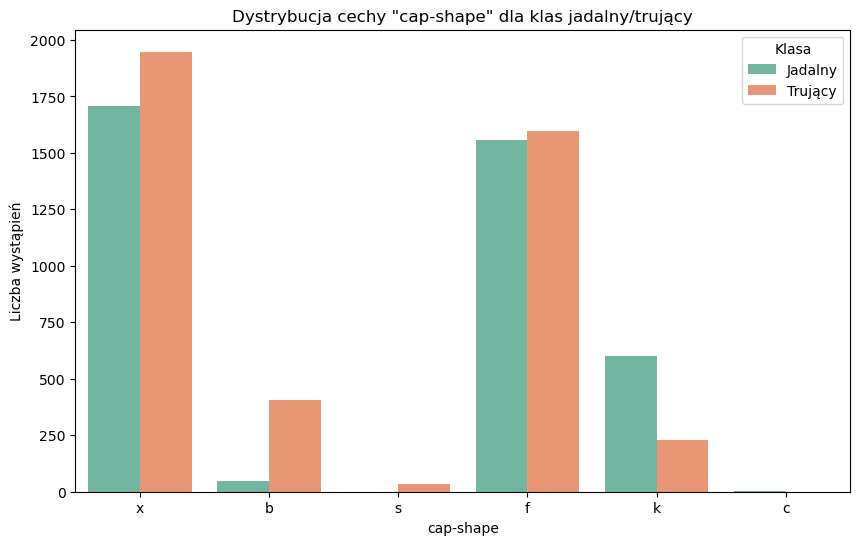

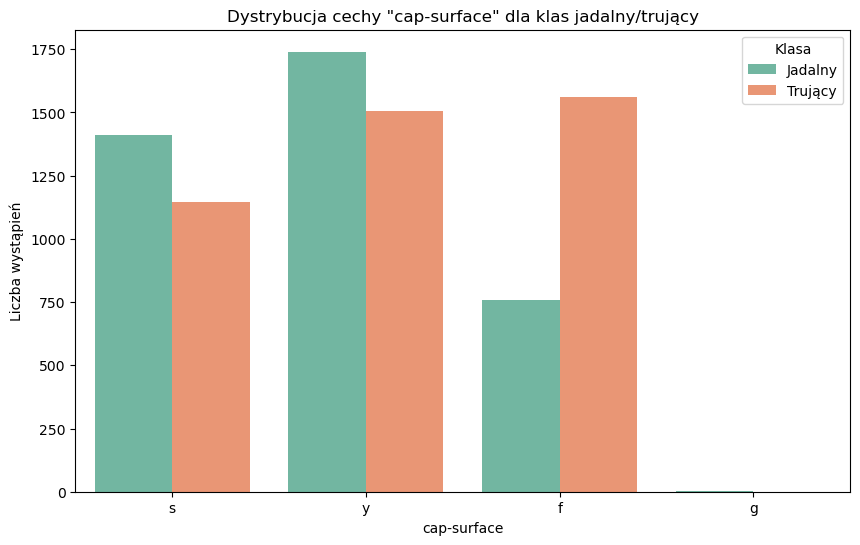

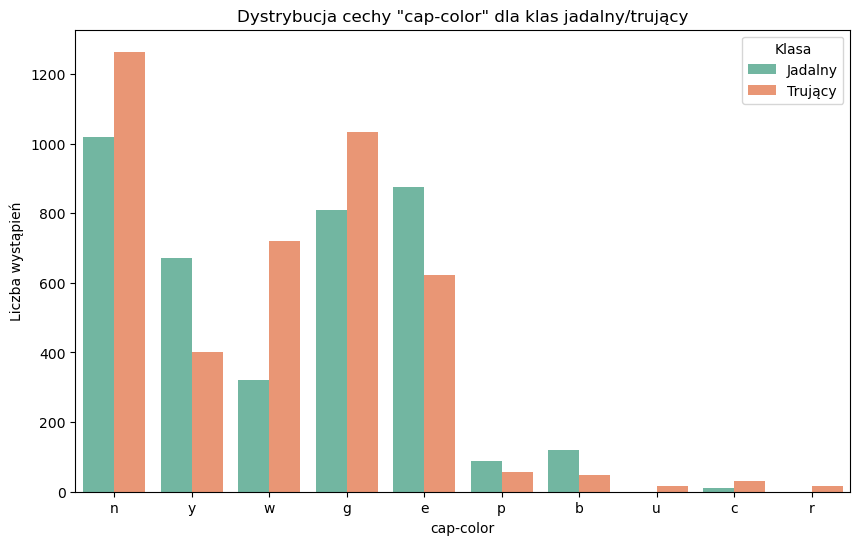

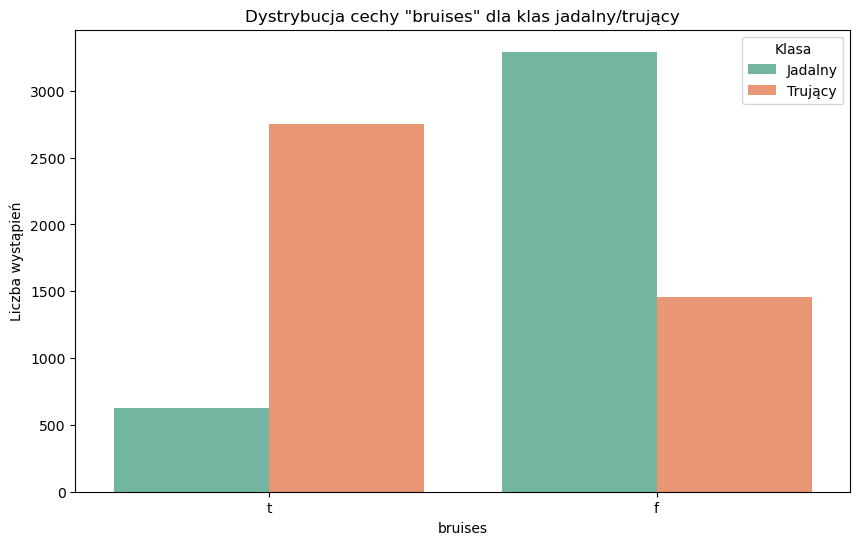

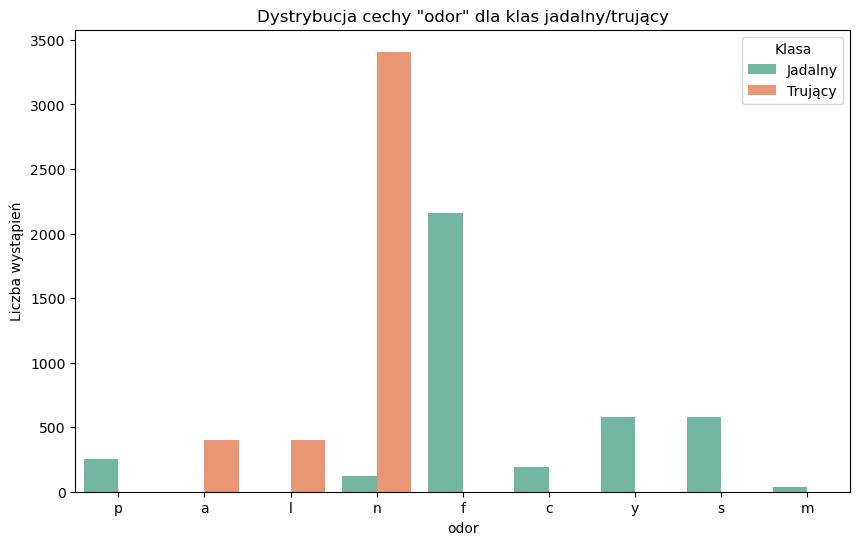

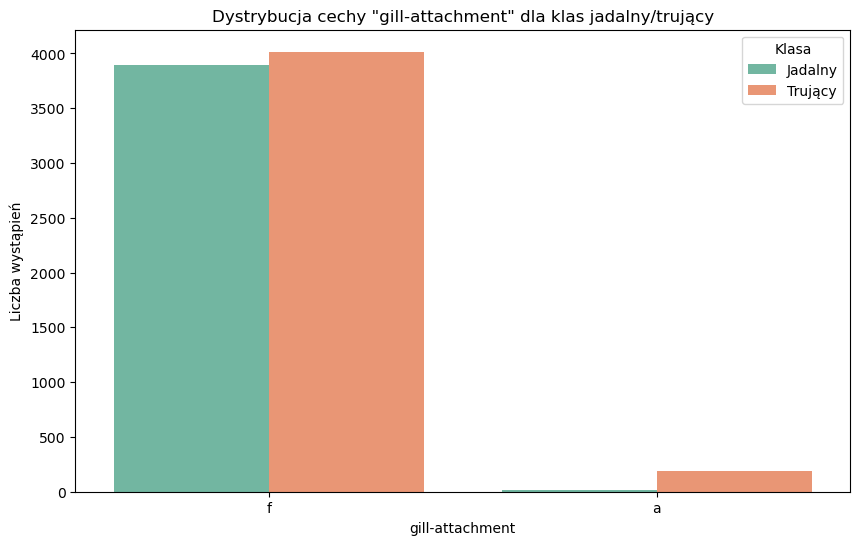

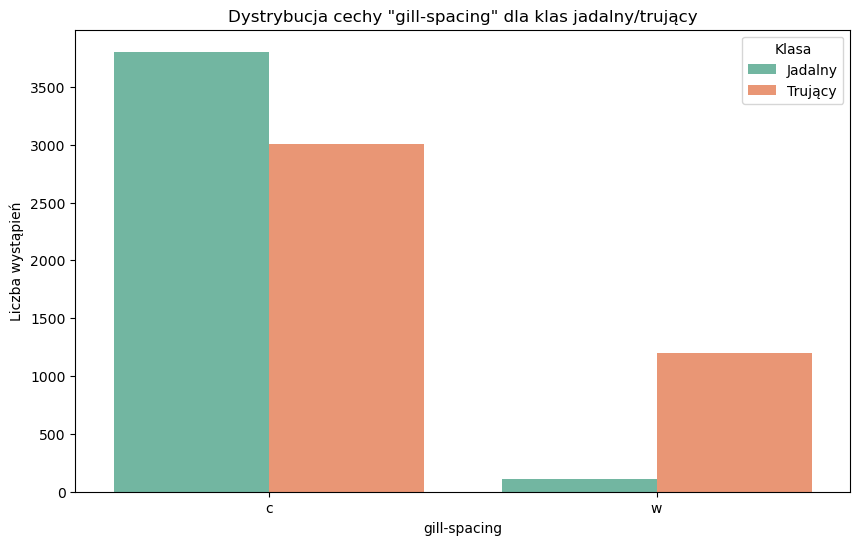

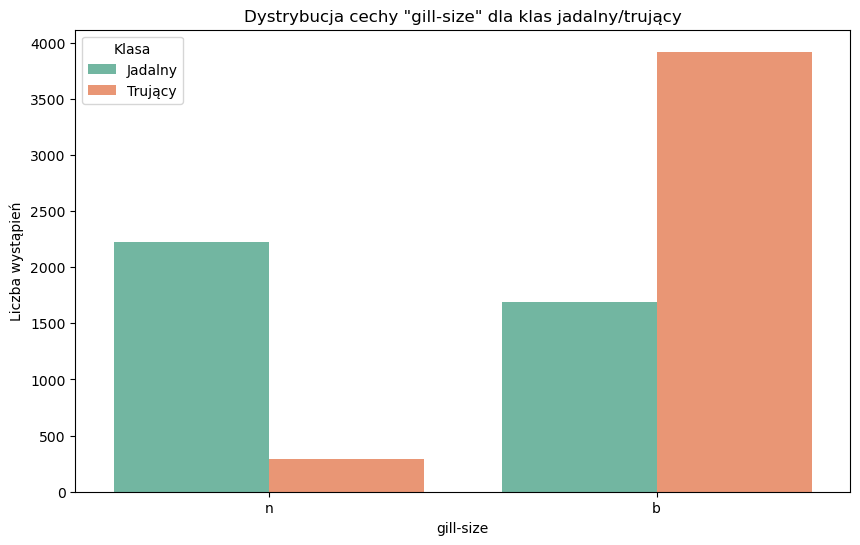

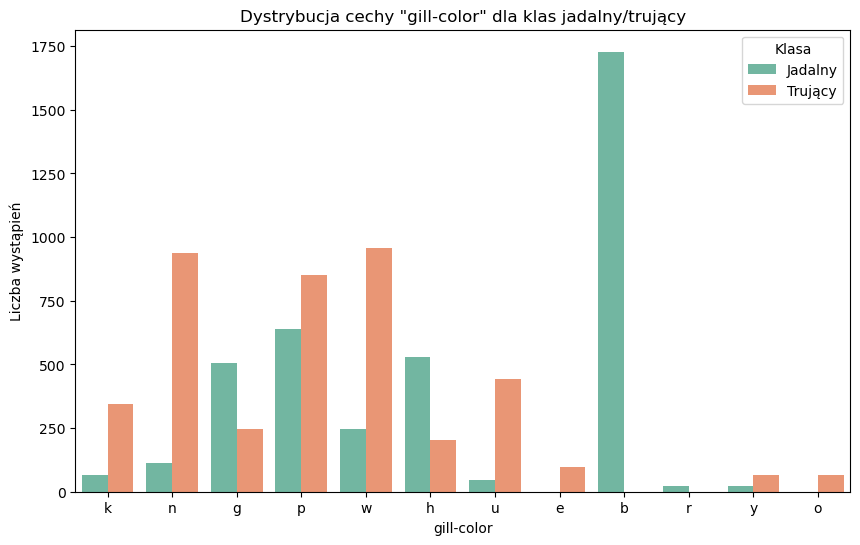

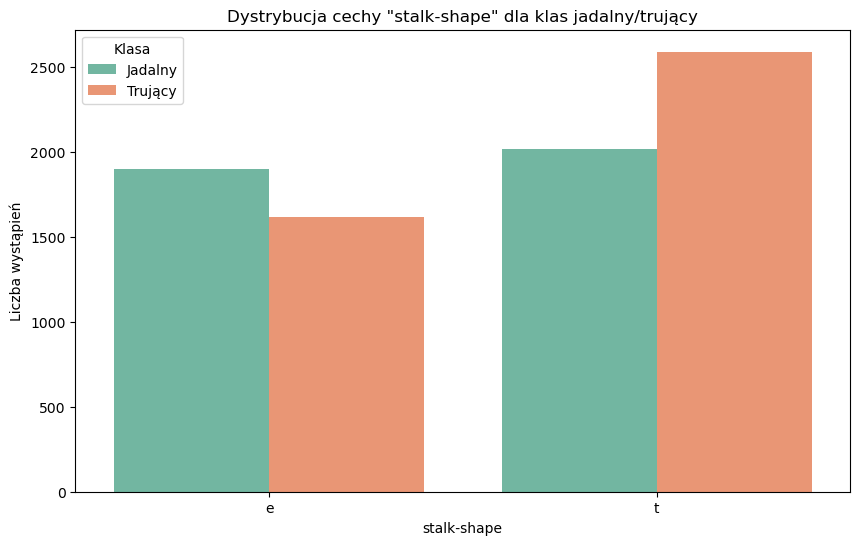

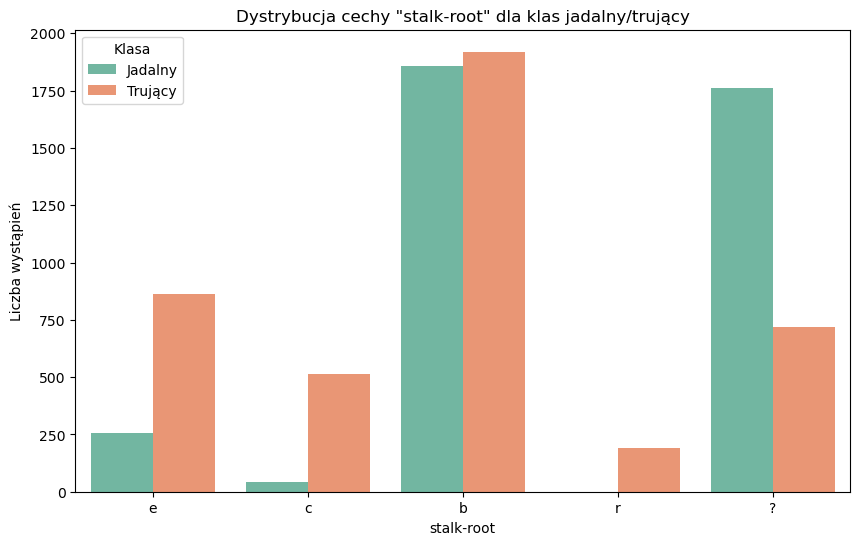

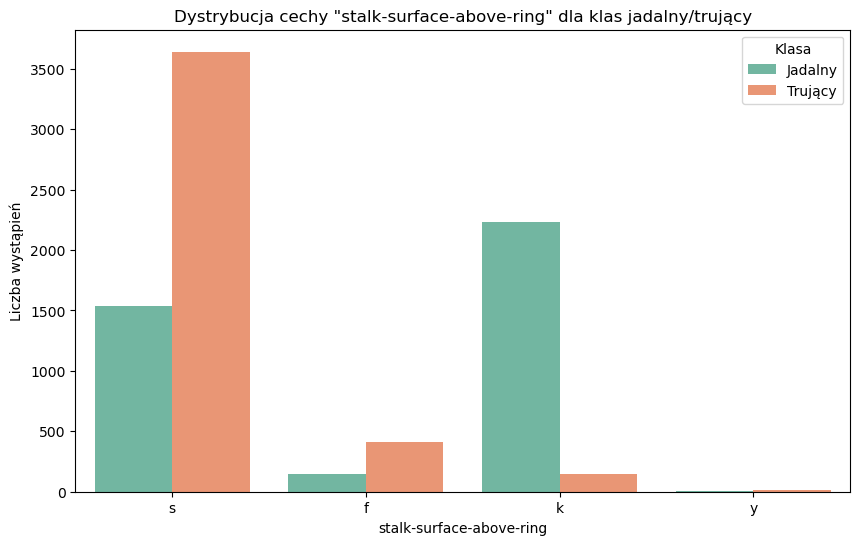

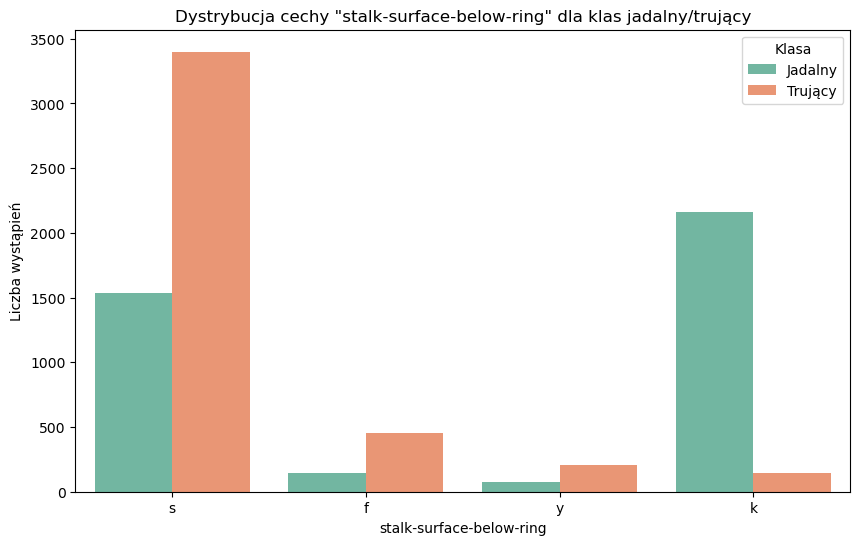

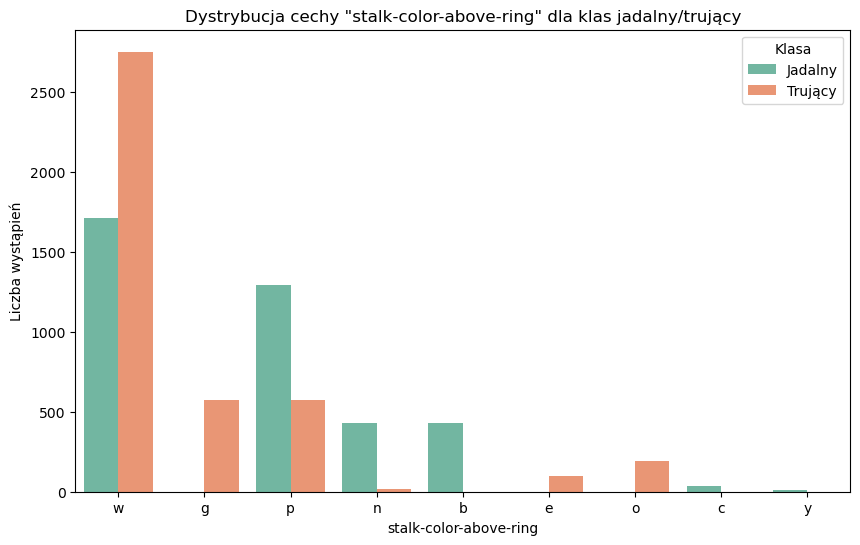

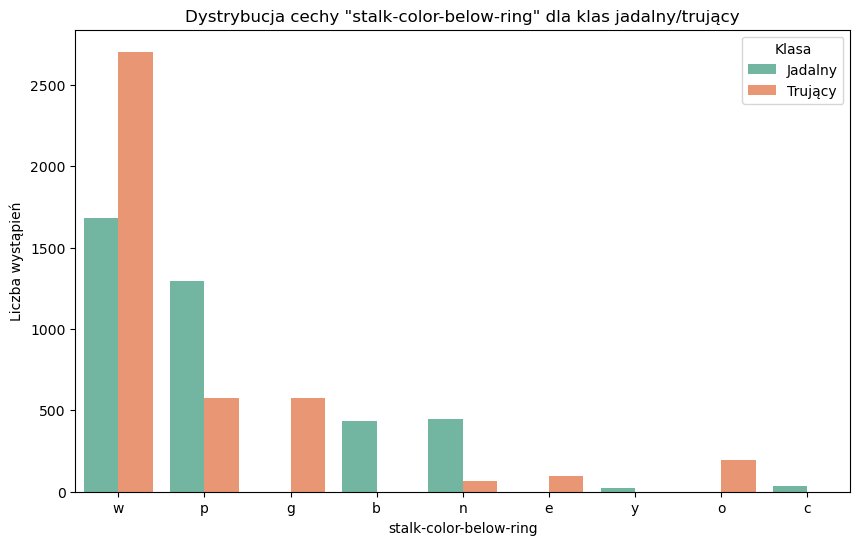

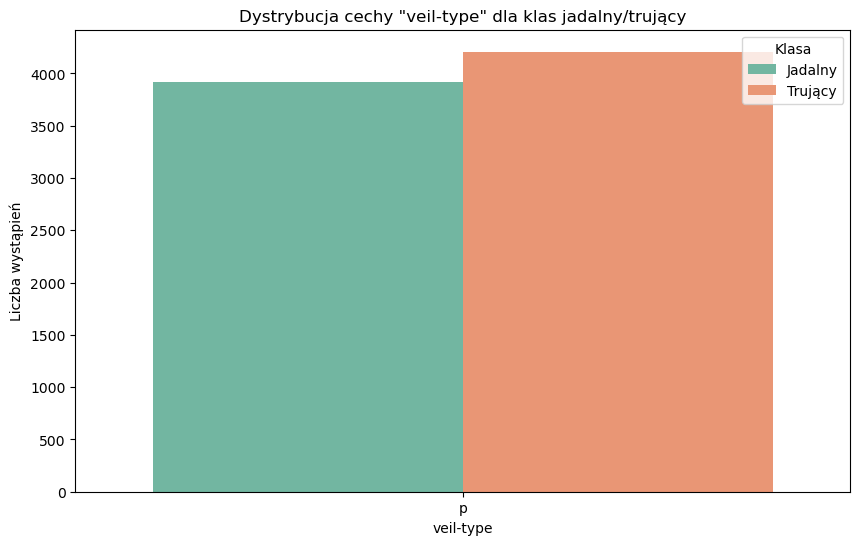

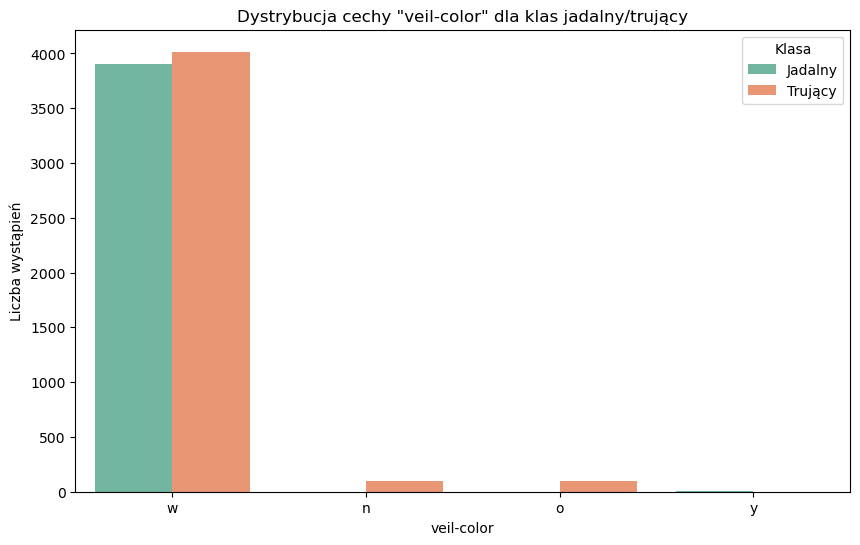

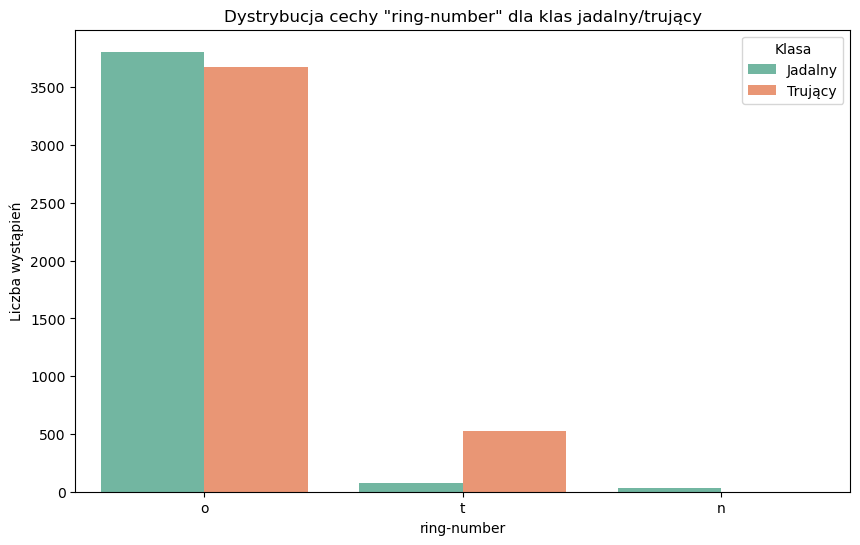

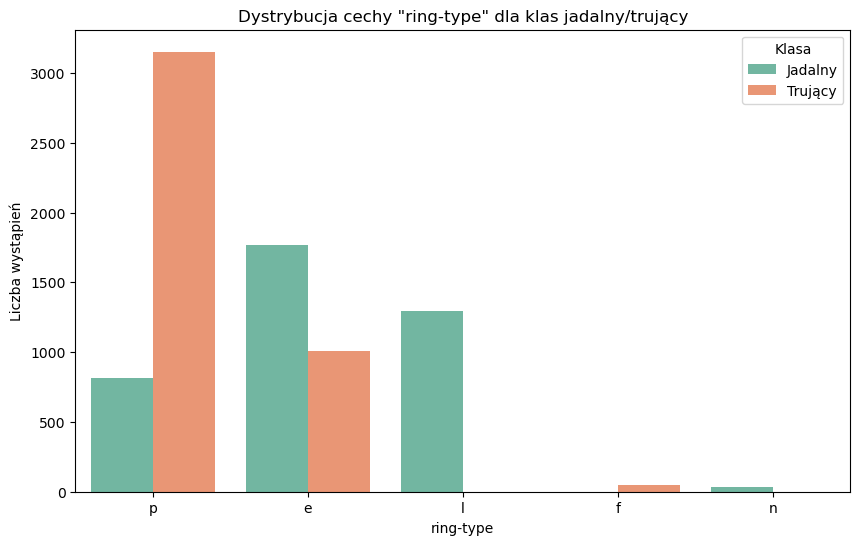

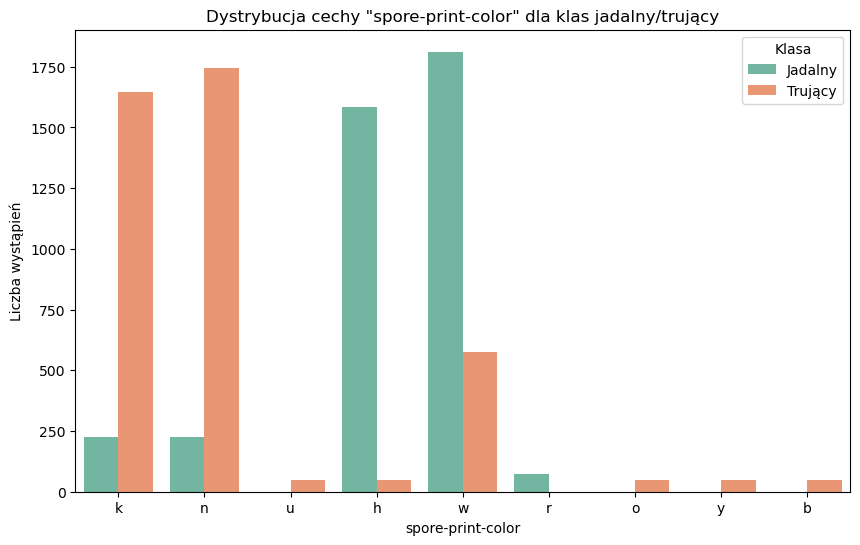

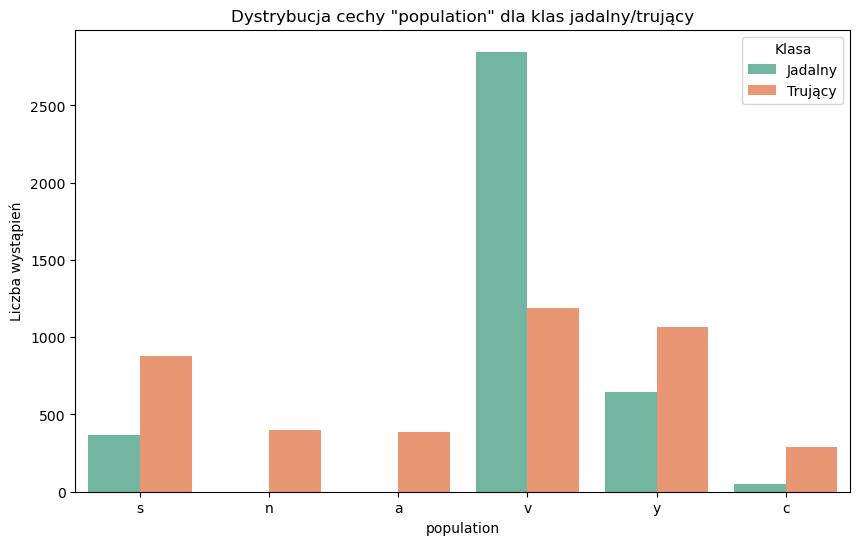

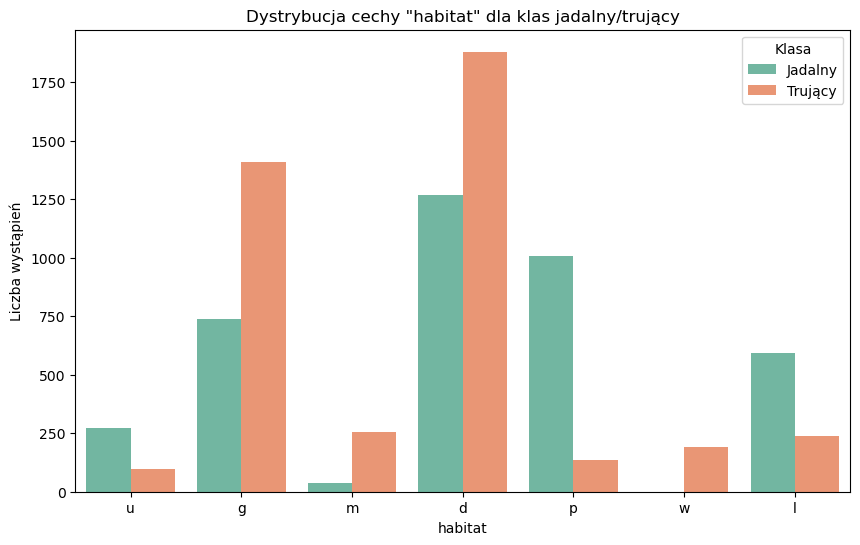

In [59]:
features = [col for col in dfm.columns if col != 'class']  # Przykładowe cechy

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dfm, x=feature, hue='class', palette='Set2')
    plt.title(f'Dystrybucja cechy "{feature}" dla klas jadalny/trujący')
    plt.xlabel(feature)
    plt.ylabel('Liczba wystąpień')
    plt.legend(title='Klasa', labels=['Jadalny', 'Trujący'])
    plt.show()

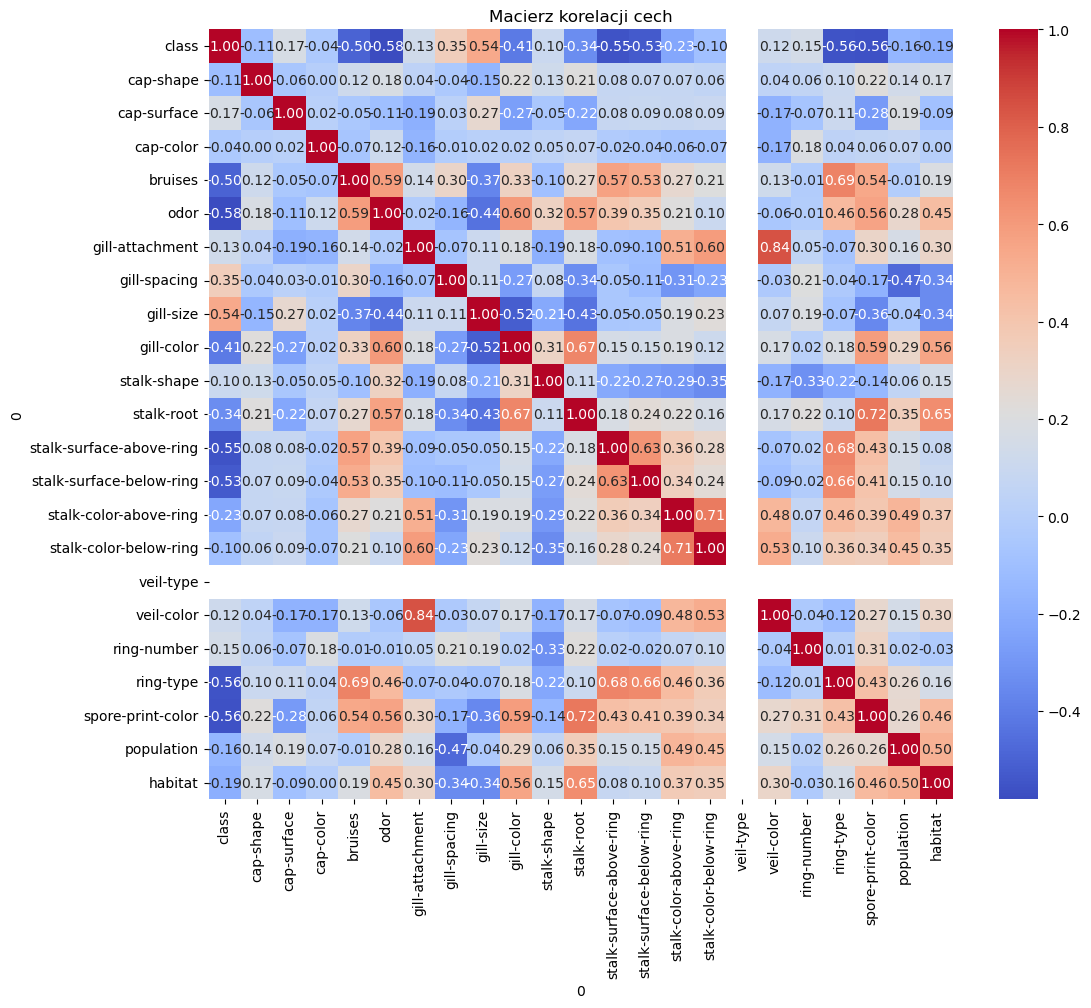

In [60]:
df_encoded = dfm.apply(lambda col: pd.factorize(col)[0])

# Obliczenie macierzy korelacji
correlation_matrix = df_encoded.corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Macierz korelacji cech')
plt.show()

Analizując macierz korelacji dla Mushroom, zauważamy, że niektóre cechy są silnie powiązane z klasą. W oparciu o te dane przygotujemy różne warianty zbioru danych, które zostaną użyte w dalszych etapach.

Dla zbioru Mushroom przygotujemy trzy różne zestawy danych: jeden z pełnymi danymi, drugi z usuniętymi cechami o wysokiej korelacji oraz trzeci zawierający tylko kluczowe cechy.

In [63]:
#Usuwamy kolumny z bardzo wieloma powtórzeniami oraz kolumnę z wartościami Null

dfm = dfm.drop('veil-type', axis=1)
dfm = dfm.drop('veil-color', axis=1)
dfm = dfm.drop('gill-attachment', axis=1)

dfm = dfm.drop('stalk-root', axis=1)

dfm.to_csv('data_output/dfm.csv', index=False)

#Wariant z usuniętymi korelacjami (pozostawiam element z najbardziej znaczącą korelacją z class)

cor = ['stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'bruises']
dfm2 = dfm
for c in cor:
    dfm2 = dfm2.drop(c, axis=1)

dfm2.to_csv('data_output/dfm_pruned.csv', index=False)

#Wariant z pozostawionymi jedynie kolumnami z największą korelacją z klasą

class_cor = ['class', 'odor', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'bruises', 'gill-size', 'ring-type', 'spore-print-color', 'gill-size']

dfm[class_cor].to_csv('data_output/dfm_very_pruned.csv', index=False)